<a href="https://colab.research.google.com/github/averma12/DL-from-scratch/blob/master/Matmul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip uninstall fastai

Uninstalling fastai-1.0.48:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/fastai-1.0.48.dist-info/*
    /usr/local/lib/python3.6/dist-packages/fastai/*
Proceed (y/n)? y
  Successfully uninstalled fastai-1.0.48


In [2]:
! pip install fastai

    100% |████████████████████████████████| 215kB 25.0MB/s 
    100% |████████████████████████████████| 17.3MB 2.4MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [0]:
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle,gzip,math,torch,matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL = "http://deeplearning.net/data/mnist/mnist.pkl"

In [5]:
path = datasets.download_data(MNIST_URL, ext='.gz')
path

PosixPath('/root/.fastai/data/mnist.pkl.gz')

In [0]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [7]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [0]:
assert x_train.shape[0]==y_train.shape[0]==50000
#test_eq(x_train.shape[1],28*28)
#test_eq(y_train.min(),0)
#test_eq(y_train.max(),9)

In [0]:
mpl.rcParams['image.cmap'] = 'gray'

In [0]:
img = x_train[0]

In [12]:
type(img)

torch.Tensor

In [13]:
img.shape

torch.Size([784])

In [14]:
#We will create a copy and view it as a 2D image in matplotlib
img.view(28,28).type()

'torch.FloatTensor'

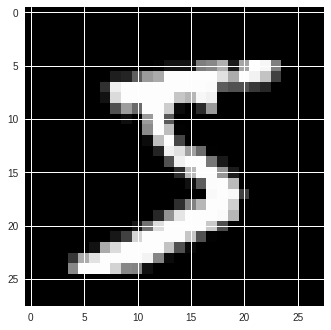

In [15]:
plt.imshow(img.view(28,28))

In [0]:
#Multiplication between 2 matrices i.e 2 2D torch tensors
def matmul(a,b):
    ar,ac = a.shape # n_rows * n_cols
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # or br
                c[i,j] += a[i,k] * b[k,j]
    return c

**Initial Python model**

In [0]:
weights = torch.randn(784,10)/math.sqrt(784)

In [0]:
bias = torch.zeros(10)

In [22]:
x_valid[:5].shape

torch.Size([5, 784])

In [0]:
m1 = x_valid[:5]
m2 = weights

In [24]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [55]:
%time t1 = matmul(m1,m2)

CPU times: user 635 ms, sys: 0 ns, total: 635 ms
Wall time: 641 ms


In [26]:
t1.shape

torch.Size([5, 10])

In [0]:
#elementwise matrix multiplication
def matmul_elem(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            # Any trailing ",:" can be removed
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [45]:
%timeit -n 10 _=matmul_elem(m1, m2)

10 loops, best of 3: 1.19 ms per loop


In [0]:
def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

In [0]:
def near(a,b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): test(a,b,near)

In [0]:
test_near(t1,matmul_elem(m1, m2))

In [57]:
matmul_elem(m1, m2)

tensor([[-0.0457, -0.0891,  0.2647,  0.5305,  0.1206, -0.0999,  0.1875, -0.1720,
          0.7453,  0.6942],
        [ 0.1509,  0.1939,  0.0779,  0.3638,  0.1546, -0.1808, -0.0448, -0.4047,
          0.1857,  0.6713],
        [ 0.3351, -0.1832,  0.5259,  0.0685, -0.1052,  0.1823,  0.0867,  0.2944,
          0.2992,  0.5605],
        [-0.0854,  0.2907, -0.2023,  0.2842, -0.0630,  0.2043,  0.1725, -0.3759,
          0.3128,  0.6542],
        [ 0.5482,  0.1424, -0.2336,  0.5968,  0.3556,  0.2494, -0.2195, -0.3105,
         -0.0495,  0.3795]])

In [58]:
t1

tensor([[-0.0457, -0.0891,  0.2647,  0.5305,  0.1206, -0.0999,  0.1875, -0.1720,
          0.7453,  0.6942],
        [ 0.1509,  0.1939,  0.0779,  0.3638,  0.1546, -0.1808, -0.0448, -0.4047,
          0.1857,  0.6713],
        [ 0.3351, -0.1832,  0.5259,  0.0685, -0.1052,  0.1823,  0.0867,  0.2944,
          0.2992,  0.5605],
        [-0.0854,  0.2907, -0.2023,  0.2842, -0.0630,  0.2043,  0.1725, -0.3759,
          0.3128,  0.6542],
        [ 0.5482,  0.1424, -0.2336,  0.5968,  0.3556,  0.2494, -0.2195, -0.3105,
         -0.0495,  0.3795]])

In [59]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [60]:
c.shape

torch.Size([3])

In [61]:
c.unsqueeze(0),c.unsqueeze(0).shape

(tensor([[10., 20., 30.]]), torch.Size([1, 3]))

In [65]:
c.unsqueeze(1).shape

torch.Size([3, 1])

**To be completed**